### Get trending repositories

In [1]:
import requests
import pandas as pd
import matplotlib.pyplot as plt
%config InlineBackend.figure_format = 'retina'

In [2]:
def get_gh_trending_endpoint(lang="JavaScript", timeframe="weekly"):
    base_url = "https://trendings.herokuapp.com"
    endpoint = f"/repo?lang={lang}&since={timeframe}"
    return base_url + endpoint

In [3]:
def get_popular_frontend_repos(timeframe="weekly"):
    repos = []
    
    for language in ["JavaScript", "TypeScript"]:
        endpoint = get_gh_trending_endpoint(language, timeframe)
        print("Getting %s ..." % endpoint)
        resp = requests.get(endpoint)
        
        resp_json = resp.json()
        if 'msg' in resp_json and resp_json['msg'] == 'suc':
               repos += resp_json['items']
    
    print("Found %d frontend repos in total." % len(repos))
    
    return repos

In [4]:
repos = get_popular_frontend_repos()

Getting https://trendings.herokuapp.com/repo?lang=JavaScript&since=weekly ...
Getting https://trendings.herokuapp.com/repo?lang=TypeScript&since=weekly ...
Found 50 frontend repos in total.


In [5]:
df = pd.DataFrame([[int(repo['stars'].replace(",", ""))] for repo in repos], index=[repo['repo'] for repo in repos], columns=['GitHub Stars'])

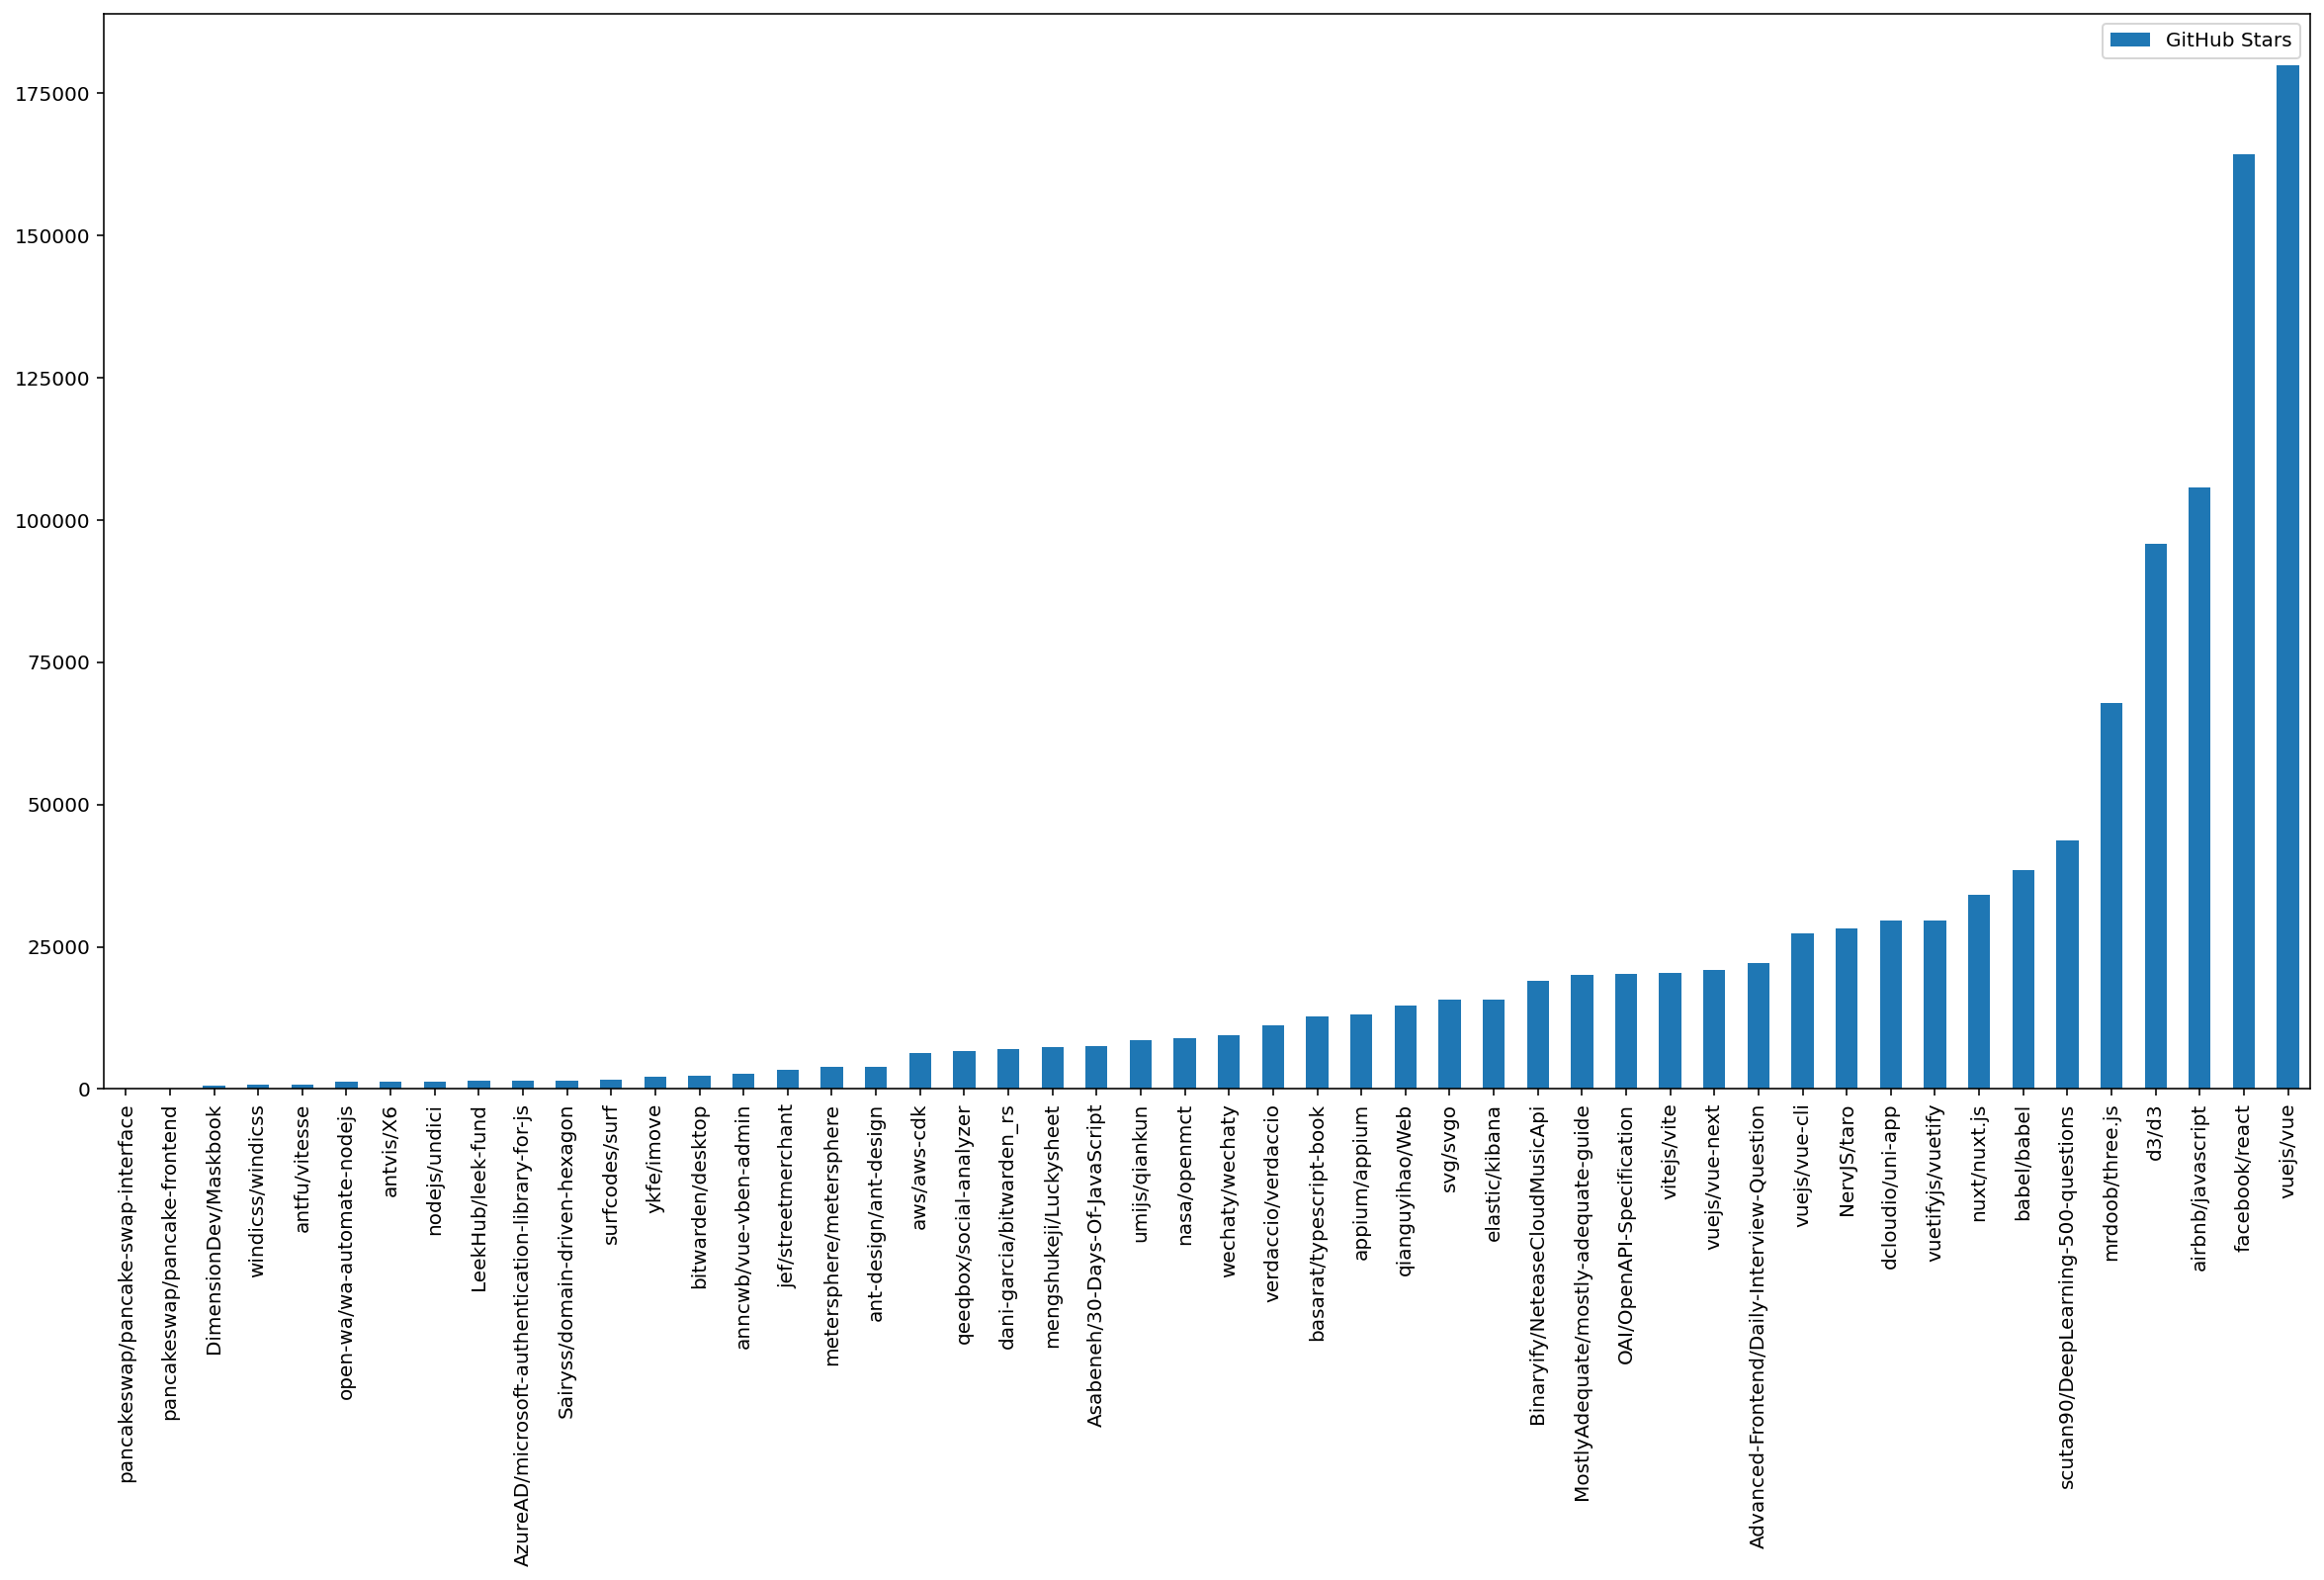

In [6]:
df.sort_values(by='GitHub Stars').plot.bar(figsize=(20,10))

In [12]:
df.sort_values(by='GitHub Stars', ascending=False)

,GitHub Stars
vuejs/vue,179915
facebook/react,164267
airbnb/javascript,105707
d3/d3,95883
mrdoob/three.js,67864
scutan90/DeepLearning-500-questions,43663
babel/babel,38481
nuxt/nuxt.js,34153
vuetifyjs/vuetify,29672
dcloudio/uni-app,29656
